<a href="https://colab.research.google.com/github/springboardmentor891v/CreditPathAI_Oct_Batch/blob/sowmya/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Loan_Default.csv to Loan_Default.csv


In [ ]:
#loading dataset
import pandas as pd
df = pd.read_csv("Loan_Default.csv")
print("First 5 rows in dataset: ")
print(df.head())
print("\nInformation of dataset: ")
df.info()


First 5 rows in dataset: 
      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP     

In [ ]:
#missing values in every col
print("Missing values in every column: ")
print(df.isnull().sum())

Missing values in every column: 
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                   

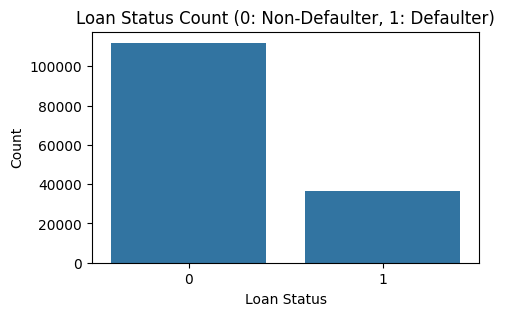

Loan Count: 
Status
0    112031
1     36639
Name: count, dtype: int64
Loan Proportion: 
Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


In [ ]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
sns.countplot(x = 'Status', data = df)
plt.title('Loan Status Count (0: Non-Defaulter, 1: Defaulter)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()
#printing
print("Loan Count: ")
print(df['Status'].value_counts())
print("Loan Proportion: ")
print(df['Status'].value_counts(normalize=True)*100)

In [ ]:
df.drop('ID', axis=1, inplace = True)
print("ID column is dropped ")

ID column is dropped 


In [ ]:
#categorical col
categorical_col = df.select_dtypes(
    include=['object']).columns
print(f"Categorical columns:  {list(categorical_col)}")

#one hot encoding
df_encoded=pd.get_dummies(df,columns=categorical_col,drop_first=True)
print("dataframe after onehot encoding: ",df_encoded.shape)
print("First 5 rows: ")
print(df_encoded.head())

Categorical columns:  ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
dataframe after onehot encoding:  (148670, 50)
First 5 rows: 
   year  loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0  2019       116500               NaN                   NaN              NaN   
1  2019       206500               NaN                   NaN              NaN   
2  2019       406500              4.56                0.2000            595.0   
3  2019       456500              4.25                0.6810              NaN   
4  2019       696500              4.00                0.3042              0.0   

    term  property_value   income  Credit_Score        LTV  ... 

In [ ]:
x = df_encoded.drop('Status',axis=1)
y = df_encoded['Status']
print("(x) shape:",x.shape)
print("(y) shape:",y.shape)

(x) shape: (148670, 49)
(y) shape: (148670,)


In [ ]:
#training & testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)


X_train shape: (118936, 49)
X_test shape: (29734, 49)
y_train shape: (118936,)
y_test shape: (29734,)
